In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

In [2]:
import pickle

In [3]:
from typing import List, Dict, Any, Tuple

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
import colorcet

In [6]:
import glob
from tqdm import tqdm
import json

In [7]:
from bertopic import BERTopic

In [8]:
# Set up LaTeX fonts
#plt.style.use(['no-latex'])
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']

In [9]:
# read embedding dict from disk
embedding_file = "../data/doc2embedding_only_topics.pkl"

with open(embedding_file, "rb") as file:
    doc2embedding: Dict[str, Dict] = pickle.load(file)

In [10]:
# to get categories, read JSON files
json_files: List = [
    json_file_id.split('/')[-1][:-5]
    for json_file_id in glob.glob('../data/json_files/*.json')
]


doc2json: Dict[str, Dict] = {}

for doc in tqdm(json_files):
    # open the file in read mode
    file_path = "../data/json_files/" + doc + ".json"
    with open(file_path, "r", encoding='utf-8',) as file:
        # Load the JSON data
        doc2json[doc] = json.load(file)

  0%|          | 0/17486 [00:00<?, ?it/s]

100%|██████████| 17486/17486 [00:01<00:00, 13297.34it/s]


In [11]:
document_indexes: List = [
    doc2json[doc]['article_id']
    for doc in doc2json

]
embeddings: np.array = np.array(
    [
        doc2embedding[doc] for doc in doc2json
    ]
)

In [12]:
tsne = TSNE(n_components=2, perplexity=100, random_state=42)

tsne_embeddings = tsne.fit_transform(embeddings)

In [13]:
summaries: List[str] = [
    doc2json[doc]["tldr"]
    for doc in doc2json
]

In [46]:
# topic_sentences: List[str] = [
#     'This article discusses the following topics: ' +
#     ', '.join(doc2json[doc]["topics"][:-1]) + ', and '
#     + doc2json[doc]["topics"][-1] + '.'
#     for doc in doc2json
# ]

topic_sentences: List[str] = [
    ' '.join(doc2json[doc]["topics"])
    for doc in doc2json
]

In [47]:
topic_sentences

['Magnetic Declination Magnetograph Curves Diurnal Inequalities Magnetic Storms Sunspot Areas',
 'Chemistry Metallurgy Glass Salt Alchemy',
 'Ammonia Organic Bases Amidogen Theory Compound Radicals Molecular Constitution',
 'Music Notation Instruments Music Composition Music Theory Innovative Devices',
 'Botany Geology Paleontology Archaeology Natural History',
 'Sulphuric Anhydride Chlorine Compounds Sulphur Compounds Organic Haloid Compounds Pyrosulphuric Chloride',
 'Calculus of Symbols Linear Partial Differential Equations Functional Equations Symbolical Division Algebraic Equations',
 'Rotifera Asplanchna Brachionus Sexual Dimorphism Reproduction',
 'Tides Atmospheric Pressure Oceanography Barometer Hydrodynamics',
 'Magnetism Magnetic Needle Magnetic Deviations Magnetic Forces Magnetic Observations',
 'Thermometer Design Heat Measurement Ceramic Materials Heat Resistance Temperature Calibration',
 'Respiration Altitude Carbon Dioxide Atmospheric Pressure Human Physiology',
 'Stat

In [48]:
topic_model = BERTopic(
    verbose=True,
    nr_topics=100,
    calculate_probabilities=True,
    n_gram_range=(1,2),
    #nr_topics="auto",
)

topics, probs = topic_model.fit_transform(
    topic_sentences, 
    embeddings,
)

# Reduce outliers
topics = topic_model.reduce_outliers(topic_sentences, topics)
topic_model.update_topics(topic_sentences, topics=topics)

topic_set = set(topics)

color_set = sns.color_palette(
    colorcet.glasbey,
    n_colors=len(topic_set)
)

topic2color = {
    topic: color
    for topic, color in zip(topic_set, color_set)
}

topic2color[-1] = (0.6, 0.6, 0.6)

topic_names = topic_model.get_topic_info()['Name'].values

topic2name = {
    int(t_name[:t_name.find('_')]): t_name
    for t_name in topic_names
}

2024-05-27 14:16:33,284 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-27 14:16:43,322 - BERTopic - Dimensionality - Completed ✓
2024-05-27 14:16:43,324 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-27 14:17:14,647 - BERTopic - Cluster - Completed ✓
2024-05-27 14:17:14,647 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-27 14:17:15,313 - BERTopic - Representation - Completed ✓
2024-05-27 14:17:15,315 - BERTopic - Topic reduction - Reducing number of topics
2024-05-27 14:17:15,874 - BERTopic - Topic reduction - Reduced number of topics from 327 to 100
100%|██████████| 5/5 [00:00<00:00,  9.55it/s]
2024-05-27 14:17:16,811 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created thro

In [49]:
# for d, s, t, p in zip(document_indexes, summaries, topics, probs):
#     print(f"Id: {d}")
#     print(f"Summary: {s}")
#     print(f"Topic: {t}")
#     print(f"Probabilities: {p}")

In [50]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0       0   1165    0_astronomy_celestial_celestial mechanics_solar   
1       1    627  1_electrical_electricity_discharge_electromagn...   
2       2    603  2_magnetic_magnetism_magnetism magnetic_magnet...   
3       3    503  3_electrochemistry_metallurgy_voltaic_electrol...   
4       4    695           4_chemistry_compounds_reactions_chemical   
..    ...    ...                                                ...   
94     94     19  94_bioluminescence_emission_light emission_ele...   
95     95     25  95_selenates_crystallography selenates_crystal...   
96     96     34    96_neurology_treatment_electrotherapy_disorders   
97     97     48      97_uterine_system_reproductive system_nervous   
98     98     26             98_arterial_pulse_blood pressure_blood   

                                       Representation  \
0   [astronomy, celestial, celestial mechanics, so...   
1   [electrical, electricity, discharge, electroma...   
2   [magnetic, magnetism, magnetism magnetic, magn...   
3   [electrochemistry, metallurgy, voltaic, electr...   
4   [chemistry, compounds, reactions, chemical, or...   
..                                                ...   
94  [bioluminescence, emission, light emission, el...   
95  [selenates, crystallography selenates, crystal...   
96  [neurology, treatment, electrotherapy, disorde...   
97  [uterine, system, reproductive system, nervous...   
98  [arterial, pulse, blood pressure, blood, cardi...   

                                  Representative_Docs  
0   [Astronomy Comets Celestial Mechanics Observat...  
1   [Electricity Electrical Conductivity Electrica...  
2   [Terrestrial Magnetism Magnetic Survey Magneti...  
3   [Electrochemistry Voltaic Cells Battery Techno...  
4   [Chemistry Inorganic Chemistry Chemical Compou...  
..                                                ...  
94  [Bioluminescence Chemiluminescence Marine Biol...  
95  [Crystallography Selenates Zinc Salts Alkali M...  
96  [Electricity and Health Paralysis Treatment Me...  
97  [Uterine Nerves Nervous Ganglia Female Reprodu...  
98  [Cardiology Sphygmography Blood Circulation Ca...  

[99 rows x 5 columns]

In [51]:
hierarchical_topics = topic_model.hierarchical_topics(topic_sentences)

100%|██████████| 98/98 [00:00<00:00, 215.48it/s]


In [52]:
article_titles = [
    doc2json[doc]["article_id"] + ': ' + doc2json[doc]["revised_title"] + '. Keyterms: ' + ', '.join(doc2json[doc]["topics"])
    for doc in document_indexes
]

topic_model.visualize_documents(article_titles, reduced_embeddings=tsne_embeddings)

In [53]:
topic_model.get_document_info(summaries)

Document  Topic  \
0      The author analyzes the magnetic declination a...      2   
1      The author discusses various chemical experime...      3   
2      The author examines the molecular constitution...      4   
3      The author presents a machine that can write d...     76   
4      The author shares his observations and discove...     16   
...                                                  ...    ...   
17481  The author describes the post-mortem examinati...     23   
17482  The authors investigate the annual and semi-an...     25   
17483  The author investigates the chemical pigments ...     43   
17484  Edward Sabine investigates the dip of the magn...      2   
17485  Bunsen and Roscoe investigate the optical and ...      8   

                                                    Name  \
0      2_magnetic_magnetism_magnetism magnetic_magnet...   
1      3_electrochemistry_metallurgy_voltaic_electrol...   
2               4_chemistry_compounds_reactions_chemical   
3                   76_musical_music_music theory_tuning   
4           16_geography_natural_natural history_history   
...                                                  ...   
17481                     23_urology_stones_kidney_urine   
17482  25_earthquake_disasters_natural disasters_seis...   
17483          43_pigments_dyes_chlorophyll_natural dyes   
17484  2_magnetic_magnetism_magnetism magnetic_magnet...   
17485                  8_refraction_optics_light_optical   

                                          Representation  \
0      [magnetic, magnetism, magnetism magnetic, magn...   
1      [electrochemistry, metallurgy, voltaic, electr...   
2      [chemistry, compounds, reactions, chemical, or...   
3      [musical, music, music theory, tuning, scales,...   
4      [geography, natural, natural history, history,...   
...                                                  ...   
17481  [urology, stones, kidney, urine, kidney stones...   
17482  [earthquake, disasters, natural disasters, sei...   
17483  [pigments, dyes, chlorophyll, natural dyes, pl...   
17484  [magnetic, magnetism, magnetism magnetic, magn...   
17485  [refraction, optics, light, optical, optical p...   

                                     Representative_Docs  \
0      [Terrestrial Magnetism Magnetic Survey Magneti...   
1      [Electrochemistry Voltaic Cells Battery Techno...   
2      [Chemistry Inorganic Chemistry Chemical Compou...   
3      [Music Theory Hindu Music Musical Intervals Mu...   
4      [Botany Zoology Geography Natural History Ecol...   
...                                                  ...   
17481  [Urology Kidney Stones Bladder Stones Medical ...   
17482  [Earthquake Seismology Natural Disasters Geoph...   
17483  [Plant Pigments Chemical Reactions Vegetable D...   
17484  [Terrestrial Magnetism Magnetic Survey Magneti...   
17485  [Polarization Double Refraction Crystal Optics...   

                                             Top_n_words  Probability  \
0      magnetic - magnetism - magnetism magnetic - ma...     0.206961   
1      electrochemistry - metallurgy - voltaic - elec...     0.071024   
2      chemistry - compounds - reactions - chemical -...     0.287250   
3      musical - music - music theory - tuning - scal...     1.000000   
4      geography - natural - natural history - histor...     1.000000   
...                                                  ...          ...   
17481  urology - stones - kidney - urine - kidney sto...     0.266407   
17482  earthquake - disasters - natural disasters - s...     0.444759   
17483  pigments - dyes - chlorophyll - natural dyes -...     0.054508   
17484  magnetic - magnetism - magnetism magnetic - ma...     0.539700   
17485  refraction - optics - light - optical - optica...     0.015429   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...  

In [54]:
#topic_model.visualize_heatmap(n_clusters=29)

In [55]:
#print(topic_model.get_topic_tree(hierarchical_topics))

In [56]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [58]:
topic_model.visualize_barchart(top_n_topics=79, n_words=10)

In [48]:
#topic2label

In [30]:
topic2label = {
    int(t_lable.split()[0]): ', '.join(t_lable.split()[0:])
    for t_lable in topic_model.generate_topic_labels(
        nr_words=20, 
        separator=" "
    )
}

topic2label

{0: '0, astronomy, celestial, celestial, mechanics, astronomical, telescopes, eclipse, mechanics, observations, solar, observational',
 1: '1, magnetic, magnetism, magnetism, magnetic, declination, magnetic, observations, magnetic, declination, iron, magnetic, properties, terrestrial, terrestrial, magnetism',
 2: '2, electrical, electricity, electromagnetic, discharge, electric, electrostatics, electromagnetism, induction, conductivity, force',
 3: '3, fish, marine, biology, marine, biology, fish, anatomy, anatomy, zoology, development, ichthyology, reproduction',
 4: '4, chemistry, compounds, organic, chemical, organic, chemistry, reactions, acid, chemical, reactions, inorganic, inorganic, chemistry',
 5: '5, heat, thermal, heat, transfer, transfer, thermodynamics, radiation, thermal, conductivity, molecular, specific, heat, gas',
 6: '6, geology, mineralogy, volcanology, water, mining, mineral, salt, springs, volcanology, geology, geochemistry',
 7: '7, plant, botany, plant, anatomy,

In [31]:
def get_category_centroids(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str]           # list of categories
    ) -> Dict[str, np.array]:    # return dict of category centroids

    cateogry_embeddings = defaultdict(list)

    for cat, tsne_emb in zip(category_list, embeddings_2D):
        cateogry_embeddings[cat].append(tsne_emb)

    category_centroids = {}

    for cat, embeddings in cateogry_embeddings.items():
        centroid = np.median(embeddings, axis=0)
        category_centroids[cat] = centroid

    return category_centroids

In [32]:
def plot_embedding_2D(
        embeddings_2D: np.array, # 2D tsne embeddings
        category_list: List[str],          # list of categories 
        with_captions: bool = True         # show category captions  
    ) -> None:                             # show plot, return None  


    colors: Dict[str, str] = [
        topic2color[cat] for cat in category_list
    ]
    
    # Create a scatter plot to visualize the t-SNE embeddings
    plt.figure(figsize=(12, 12))

    scatter = plt.scatter(
        embeddings_2D[:, 0], 
        embeddings_2D[:, 1], 
        alpha=0.25, 
        c=colors,
        marker='o',
        s=18
    )

    category_centroids = get_category_centroids(
        embeddings_2D, 
        category_list
    )


    handles = [
        plt.Line2D(
            [],
            [],
            marker='o',
            color=topic2color[cat], 
            linestyle='', 
            markersize=8,
            label=topic2label[cat]
        ) for cat in sorted(list(category_centroids.keys())) 
        if cat != 'Other'
    ]

    if with_captions:

        for cat, centroid in category_centroids.items():

            if cat == "Other":
                continue

            #rand_int = random.randint(-5, 5)

            plt.text(
                centroid[0], #- 15, 
                centroid[1], #- rand_int, 
                cat, #r"${{{}}}$".format(category2text[cat]), 
                fontdict=dict(fontsize=24, fontweight='normal', color='black'), 
                bbox=dict(
                    facecolor=topic2color[cat], 
                    alpha=0.5, 
                    linewidth=0, 
                    boxstyle='round,pad=0.1'
                    )
                )

    plt.legend(
        handles=handles, 
        title="", 
        fontsize=18, 
        framealpha=0,
        #loc='lower center',
        loc='upper left', 
        #bbox_to_anchor=(0.5, -0.25), 
        bbox_to_anchor=(1, 1), 
        #ncols=3,
        ncols=1,
    )


    plt.title('t-SNE projections', fontsize=16)
    #plt.xlabel('t-SNE Dimension 1')
    #plt.ylabel('t-SNE Dimension 2')
    #plt.ylim(-100, 100)
    #plt.xlim(-110, 110)

    plt.show()    

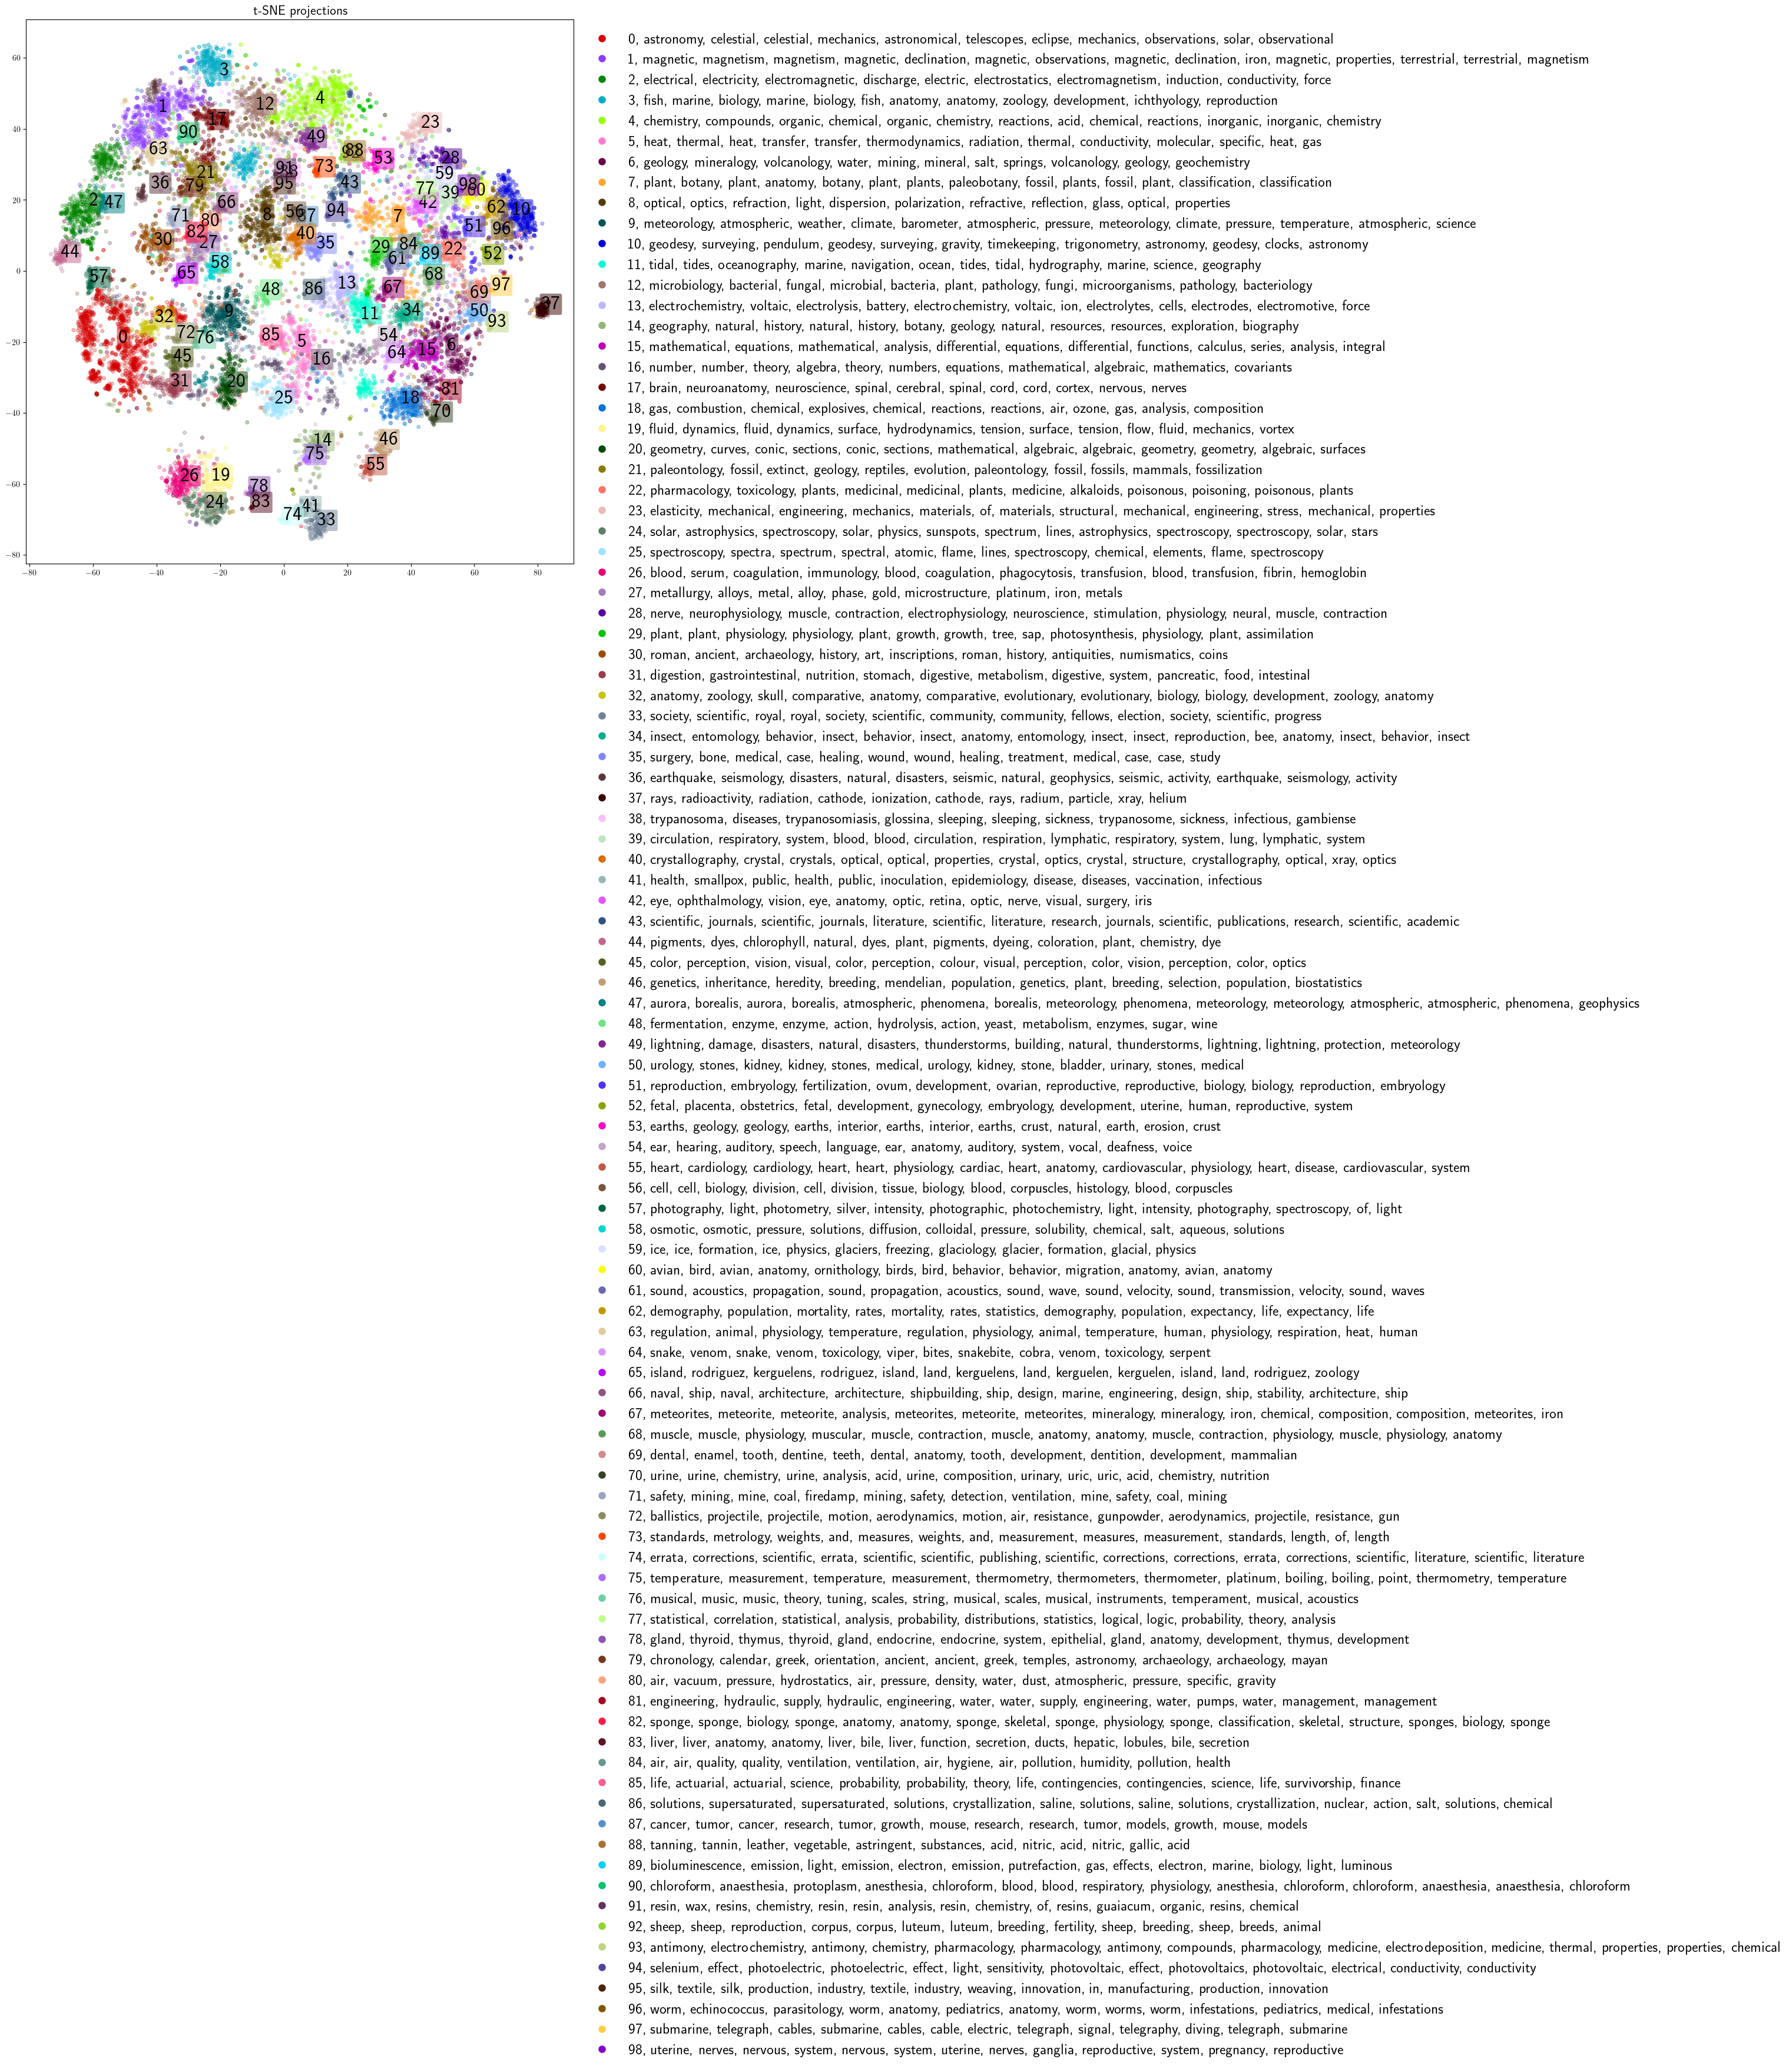

In [59]:
plot_embedding_2D(tsne_embeddings, topics, with_captions=True)

In [53]:

# read the metadat file into a pandas dataframe
metadata_file = '../data/Royal_Society_Corpus_open_v6.0_meta.tsv'

metadata_df = pd.read_csv(metadata_file, delimiter='\t')

metadata_df.head()

id       issn  \
0  rspa_1905_0001  0950-1207   
1  rspa_1905_0002  0950-1207   
2  rspa_1905_0003  0950-1207   
3  rspa_1905_0004  0950-1207   
4  rspa_1905_0005  0950-1207   

                                               title fpage lpage  year  \
0  Address delivered by the President, Sir Willia...     1    29  1905   
1  The boring of the Simplon Tunnel, and the dist...    29    33  1905   
2  On a method of finding the conductivity for heat.    34    48  1905   
3  Theory of the reflection of light near the pol...    49    65  1905   
4  On the relation between variations of atmosphe...    66    86  1905   

   volume                                            journal  \
0      76  Proceedings of the Royal Society of London. Se...   
1      76  Proceedings of the Royal Society of London. Se...   
2      76  Proceedings of the Royal Society of London. Se...   
3      76  Proceedings of the Royal Society of London. Se...   
4      76  Proceedings of the Royal Society of London. Se...   

                                              author     type  ... tokens  \
0      Sir William Huggins K. C. B., O. M., F. R. S.   speech  ...  14279   
1  Francis Fox, M. Inst. C. E. |C. V. Boys, F. R. S.  article  ...   1816   
2                       Professor C. Niven, F. R. S.  article  ...   3624   
3  Richard C. Maclaurin, M. A., LL. D.|Professor ...  article  ...   2722   
4  Captain H. G. Lyons|Sir W. E. Garstin, G. C. M...  article  ...  10079   

                                   visualizationLink                     doi  \
0  http://corpora.clarin-d.uni-saarland.de/surpri...  10.1098/rspa.1905.0001   
1  http://corpora.clarin-d.uni-saarland.de/surpri...  10.1098/rspa.1905.0002   
2  http://corpora.clarin-d.uni-saarland.de/surpri...  10.1098/rspa.1905.0003   
3  http://corpora.clarin-d.uni-saarland.de/surpri...  10.1098/rspa.1905.0004   
4  http://corpora.clarin-d.uni-saarland.de/surpri...  10.1098/rspa.1905.0005   

  jstorLink  hasAbstract  isAbstractOf  primaryTopic  primaryTopicPercentage  \
0       NaN          NaN           NaN     Biography               87.018807   
1       NaN          NaN           NaN     Geography               34.843817   
2       NaN          NaN           NaN   Electricity               22.229782   
3       NaN          NaN           NaN        Tables               38.543461   
4       NaN          NaN           NaN   Meteorology               51.203697   

   secondaryTopic  secondaryTopicPercentage  
0      Immunology                  3.397728  
1  Thermodynamics                 26.224835  
2        Formulae                 19.054271  
3  Fluid Dynamics                 28.361855  
4       Geography                 22.031809  

[5 rows x 29 columns]

In [59]:
# add year, decade, and period to the dictionaries in doc2json

for doc in tqdm(doc2json):
    df_row = metadata_df.loc[metadata_df['id'] == doc]
    year = df_row['year'].values[0]
    decade = df_row['decade'].values[0]
    period = df_row['period'].values[0]

    doc2json[doc]['year'] = year
    doc2json[doc]['decade'] = decade
    doc2json[doc]['period'] = period

  0%|          | 0/17486 [00:00<?, ?it/s]

100%|██████████| 17486/17486 [00:13<00:00, 1287.74it/s]


In [67]:
decades = [
    doc2json[doc]['decade'] for doc in document_indexes
]

In [68]:

topics_over_time = topic_model.topics_over_time(topic_sentences, decades)

topic_model.visualize_topics_over_time(topics_over_time, topics=[15, 40, 42, 62])

0it [00:00, ?it/s]

27it [00:01, 19.97it/s]
